## CASE STUDY ASSIGNMENT 7 - Final Case Classifier

#### Team: Nicole Wittlin, Joe Schueder, Steven Hayden and Kevin Mendonsa

## Introduction



## Data Processing 

Each execution of this Jupyter notebook reads the data from the CSV file on. 

In [3]:
#import all packages needed
import pandas as pd
from pandas_profiling import ProfileReport

In [4]:
# read and view the data 
df = pd.read_csv(r'C:\Users\jjschued\Documents\SMU\7333 QTW\final_project.csv', nrows = 30000)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


## Exploratory Data Analysis 

After confirming the proper type of data frame, we conducted exploratory data analysis to better understand the dataset. Our first step was to understand the variables and their associated meaning in relation to an email message. The data dictionary below provides a summary. Note, the target variable to predict - **IsSpam** - is also included. There is a unique record id - Unnamed: 0 - which is not necessary for our analysis but we retained it for reference as needed.

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')

### Data Dictionary

| VARIABLE | DEFINITION |
|:-|:-|
| whatever | 1 if good 0 if not |


In [17]:
profile = ProfileReport(df, title='Final_EDA_Report', plot={'histogram':{'bayesian_blocks_bins': False}}, minimal=True, explorative=True)

profile.to_widgets()



#The report can be downloaded from here:  https://github.com/jjschueder/7333QTW/blob/master/Case%20Study%203/SpamData_EDA_report.html
#After downloading report to your computer it can be opened from a web browser.  Note the report will not directly open in 
#Github, but needs to be downloaded.

In [ ]:
profile.to_file("Final_Report.html")

### Data Profile Analysis

Next, we dug deeper into the exploratory analysis to understand the descriptive statistics, data distributions, and correlations between variables. Using standard Python operators and the **Pandas Profiling** package, we found some notable characteristics about select variables. 

-------------------------------------------------------------------------------------------------------------------------------

#### Missing data: 
* subSpam (7 missing)


We devised an imputation strategy to address the missing data; this is outlined in detail later in the document. The charts below visually reinforce the missing information.

#### Missing Values


The graphic above illustrates the variables with missing values as indicated in the table. In the count graph, we can visualize the count of data points in each feature. We can conclude that some of the features have missing data points.The attributes that have missing values have been highlighted. 



#### Missing Values - Heatmap


The correlation heat map helps identify if there is any relation between missing values. A higher value (closer to 1) indicates a greater number of missing values between the corresponding variables in the same records.  

#### Data Issues and Warnings


-------------------------------------------------------------------------------------------------------------------------------

### Correlations and Outliers
Next, we look at two types of correlation to understand the relationships between variables and noted outliers that might impact our analysis.

**Pearson's Correlation**

The Pearson correlation coefficient is used to measure the strength of a linear association between two variables, where the value r = 1 means a perfect positive correlation and the value r = -1 means a perfect negataive correlation. It inofrms whether a statistically significant linear relationship exists between two continuous variables. The strength of a linear relationship (i.e., how close the relationship is to being a perfectly straight line) 

(Reference: https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)

Interpretation of Pearson's coefficient.
* Exactly –1. A perfect downhill (negative) linear relationship

* –0.70. A strong downhill (negative) linear relationship

* –0.50. A moderate downhill (negative) relationship

* –0.30. A weak downhill (negative) linear relationship

* 0. No linear relationship

* +0.30. A weak uphill (positive) linear relationship

* +0.50. A moderate uphill (positive) relationship

* +0.70. A strong uphill (positive) linear relationship

* Exactly +1. A perfect uphill (positive) linear relationship


It is evident from the correlation map above that some of the variables are correlated with others. perHTML is correlated with isSpam (dependent variable), bodyCharCt and numLines while perCaps is also correlated with isSpam. subQuestCt is also correlated with numDlr. Other smaller correlations are also evident from the correlation plot.

-------------------------------------------------------------------------------------------------------------------------------

**PHI Correlation**

The phi correlation coefficient (phi) is one of a number of correlation statistics used to measure the strength of association between two variables. It is a nonparametric statistic used in cross-tabulated data where both variables are dichotomous. The phi coefficient (or mean square contingency coefficient and denoted by φ or rφ) is a measure of association for two binary variables. 

Interpretation of the Phi coefficient.
* -1.0 to -0.7 strong negative association. 
* -0.7 to -0.3 weak negative association. 
* -0.3 to +0.3 little or no association.


**Outliers and Odd Data**

A simple Python describe function, revealed a few outliers and data anomalies. Since our dataset includes the target variable **y**, we can see if these outliers or oddities are known to be associated with spam. While it may not directly impact our predictions, it provides insights into our data.

- **subQesCt** outliers of 8 and 12 question marks in subject were not necessarily spam.


-------------------------------------------------------------------------------------------------------------------------------

In [18]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,29993.000000,29997.000000,29990.000000,29992.000000,29993.000000,29996.000000,29996.000000,29992.000000,29993.000000,29998.000000,...,29995.000000,29995.000000,29992.000000,29992.000000,29993.000000,29992.000000,29991.000000,29999.000000,29996.000000,30000.00000
mean,0.001185,-0.024842,-1.169562,-0.040114,0.007446,0.039565,-1.699530,-7.802342,-0.089949,0.011310,...,6.727806,-1.842523,-0.008540,0.032168,0.000774,-12.741918,0.027407,-0.000890,-0.664356,0.40210
std,0.373509,6.363677,13.282041,8.060974,6.379965,7.696296,19.311367,30.441869,8.918243,6.339681,...,18.786712,5.077692,1.537493,4.155061,0.397504,36.483231,4.777946,1.942009,15.071817,0.49033
min,-1.424271,-24.349716,-55.711328,-30.994582,-24.647075,-32.762741,-81.000085,-128.708142,-37.691045,-25.387789,...,-82.167224,-27.756708,-6.178031,-17.983487,-1.533013,-199.396118,-18.193221,-6.977865,-61.389297,0.00000
25%,-0.249853,-4.283565,-10.308271,-5.476366,-4.379403,-5.138103,-14.987504,-27.391085,-6.079629,-4.228827,...,-5.780648,-5.175010,-1.049192,-2.758959,-0.267912,-36.425476,-3.220538,-1.322105,-10.965160,0.00000
50%,0.000676,0.003682,-1.355134,0.011032,-0.023997,0.033368,-1.968177,-7.153161,-0.091301,0.007923,...,6.751098,-1.936167,-0.009449,-0.000389,0.001178,-12.954437,0.053564,-0.017355,-0.588394,0.00000
75%,0.251500,4.279125,7.842152,5.440364,4.340317,5.211819,11.403379,12.061010,5.891916,4.270826,...,19.412549,1.434449,1.022891,2.797359,0.269361,11.225368,3.277513,1.318936,9.687417,1.00000
max,1.600849,25.915356,57.908998,38.906025,24.796130,31.948130,84.195332,147.698807,33.324582,27.054818,...,88.883264,20.882502,6.441093,17.007392,1.598002,134.382100,18.426549,8.206509,57.144831,1.00000


### Missing Value Imputation Steps

In [29]:
# Missing Data Summary
countOfNan = pd.Series(df.isnull().sum()) 
DataType = pd.Series(df.dtypes) 

# Assemble into a single dataframe for viewing
frame = { 'datatype': DataType, 'count of Nan': countOfNan } 
result = pd.DataFrame(frame) 
print(result)

    datatype  count of Nan
x0   float64             7
x1   float64             3
x2   float64            10
x3   float64             8
x4   float64             7
x5   float64             4
x6   float64             4
x7   float64             8
x8   float64             7
x9   float64             2
x10  float64            10
x11  float64             7
x12  float64             7
x13  float64             7
x14  float64             7
x15  float64             8
x16  float64             6
x17  float64             3
x18  float64             7
x19  float64             7
x20  float64             6
x21  float64             4
x22  float64             7
x23  float64            11
x24   object             8
x25  float64             4
x26  float64             3
x27  float64             8
x28  float64             7
x29   object             6
x30   object             5
x31  float64             5
x32   object             5
x33  float64             5
x34  float64             3
x35  float64             7
x

As observed above, we have missing values in the dataset.  However, to improve the classification results of Spam we adopted the following approaches to address missing values in our dataset .

**Imputation approach for Variables: subExcCt, subQuesCt, subBlanks, isYelling, subSpamWords**
* Given the large dataset of 9348 observations, we opted to drop the 20 rows that were missing data in the variables “subExcCt”, “subQuesCt”, and “subBlanks”. 
* The missing values associated with these three variables were all absent in the same observations/rows; therefore, only 20 observations were excluded in the dataset. This raised concerns that there could have been an error recording these observations. 
* We felt this was an appropriate step given it represented only **0.2%** of the overall dataset. 
* Dropping these observations/records also eliminated the missing values in the variables “isYelling” and “subSpamWords.”



**Imputation approach for Variable: numRec**
* The variable number of recipients (numRec) has the most missing values at 282. 
* We decided to impute the missing values with the mean number of recipients. 
* This imputation was done after splitting the data into training and testing datasets. 
* The mean was calculated using only the training dataset. 
* We felt this would most closely mimic a production environment and limit "data leakage" between the training and testing datasets. 
* We used the Pipeline approach as indicated below to address this imputation as one of the steps in the pipeline.


**Imputation approach for Variable: noHost**
* The remaining missing data point was one value for “noHost"; we imputed this with the mean. 
* We used the Pipeline approach as indicated below to address this imputation as one opf the steps in the pipeline.

In [20]:
# Create a new dataset after filtering out NaNs for variable subQuesCt 
# which also addressed NaNs in subExcCt, subBlanks, isYelling and subSpamWords

dfNoNa = df[~df['x1'].isnull()]

#### Unique data for characteristic feature analysis
x24, 230, x30 should be encoded
x32  should be converted to a fload
x37 should be dropped

In [33]:
uniques = df.nunique()
uniques

x0     29993
x1     29997
x2     29990
x3     29992
x4     29993
x5     29996
x6     29996
x7     29992
x8     29993
x9     29998
x10    29990
x11    29993
x12    29993
x13    29993
x14    29993
x15    29992
x16    29994
x17    29997
x18    29993
x19    29993
x20    29994
x21    29996
x22    29993
x23    29989
x24        3
x25    29996
x26    29997
x27    29992
x28    29993
x29       12
x30        5
x31    29995
x32       10
x33    29995
x34    29997
x35    29993
x36    29994
x37    28757
x38    29995
x39    29996
x40    29994
x41    29995
x42    29995
x43    29992
x44    29992
x45    29993
x46    29992
x47    29991
x48    29999
x49    29996
y          2
dtype: int64

In [5]:
df = df.drop(columns=['x37'])

In [6]:
df['x32'] = df['x32'].str.rstrip('%').astype(float) / 100.0

In [7]:
df = df.dropna()

In [8]:
dfdummy = pd.get_dummies(df)

In [9]:
dfdummy

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,0,0,0,0,0,1,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,1
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,0,0,0,0,0,0,1
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,0,0,0,0,0,0,1
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.295646,-3.846043,2.215605,0.020874,-1.371479,-4.446031,3.221323,66.560739,-4.605288,1.286959,...,0,0,0,0,0,0,0,1,0,0
29996,0.181807,10.030832,-18.778141,4.799958,1.284206,6.156256,-27.302006,-19.734598,7.557183,-3.705144,...,0,0,0,1,0,0,0,0,0,1
29997,-0.501031,5.220178,21.788209,-5.780639,-2.109602,4.939718,31.678418,-0.260994,-3.131802,9.429713,...,0,0,0,1,0,0,0,1,0,0
29998,-0.270119,-7.453609,-30.223552,-10.980997,-4.365159,0.467329,-43.942773,14.578370,-1.289874,-6.100423,...,0,0,0,0,0,0,0,0,0,1


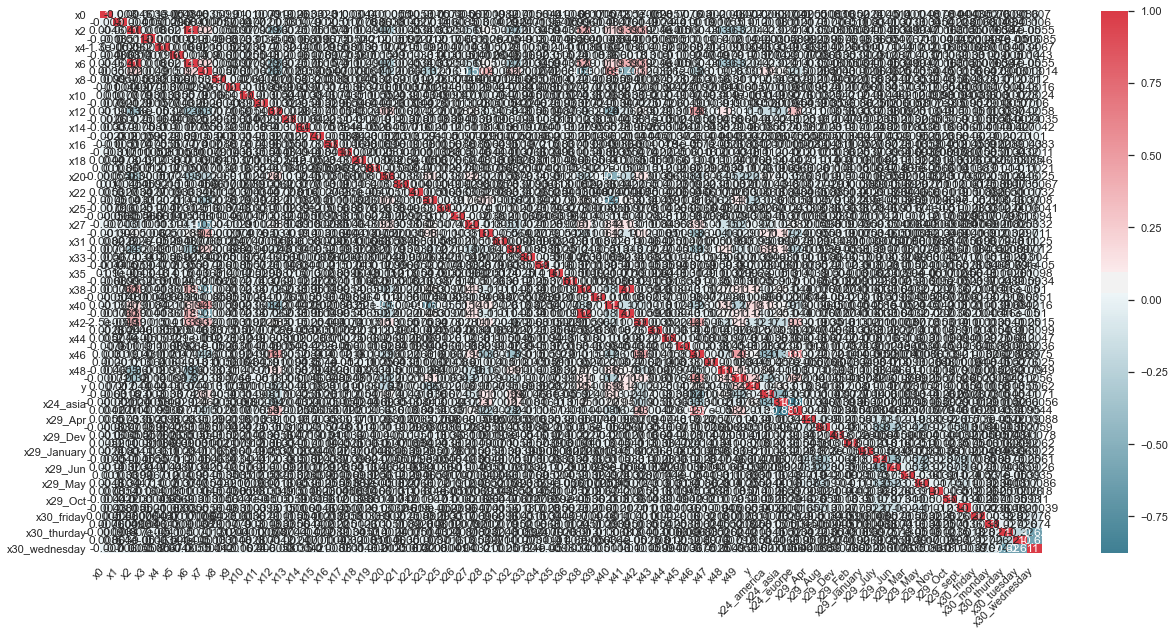

In [14]:

# plot the correlation matrix using seaborn
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings


# show the heatmap
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(18, 9))
chart=sns.heatmap(dfdummy.corr(), cmap=cmap, annot=True)
chart.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
f.tight_layout()

#correlation_matrix = dfsecondset.corr()
#.round(2)
#plt.figure(figsize = (16,8))
# annot = True to print the values inside the square
#sns.heatmap(data=correlation_matrix, annot=True)

In [12]:
dfdummy.corr

<bound method DataFrame.corr of              x0         x1         x2         x3         x4         x5  \
0     -0.166563  -3.961588   4.621113   2.481908  -1.800135   0.804684   
1     -0.149894  -0.585676  27.839856   4.152333   6.426802  -2.426943   
2     -0.321707  -1.429819  12.251561   6.586874  -5.304647 -11.311090   
3     -0.245594   5.076677 -24.149632   3.637307   6.505811   2.290224   
4     -0.273366   0.306326 -11.352593   1.676758   2.928441  -0.616824   
...         ...        ...        ...        ...        ...        ...   
29995 -0.295646  -3.846043   2.215605   0.020874  -1.371479  -4.446031   
29996  0.181807  10.030832 -18.778141   4.799958   1.284206   6.156256   
29997 -0.501031   5.220178  21.788209  -5.780639  -2.109602   4.939718   
29998 -0.270119  -7.453609 -30.223552 -10.980997  -4.365159   0.467329   
29999 -0.181244 -11.876686 -24.561295  -7.876127 -10.412501   1.473437   

              x6         x7        x8        x9  ...  x29_Mar  x29_May  \
0    

## Splitting the Data

#### Using Python's Data Split method from scikit learn which is equivalent to R's split() function

We used the ShuffleSplit method which randomly samples the entire dataset during each iteration to generate a training set and a test set. The test_size and train_size parameters determines how the percentage size of the test and training test for each iteration. Since we are sampling from the entire dataset during each iteration, values selected during one iteration, could be selected again during another iteration. (Reference: https://stackoverflow.com/questions/34731421/whats-the-difference-between-kfold-and-shufflesplit-cv)

The settings we used for the ShuffleSplit are:
* n_splits=10
* random_state=101 
* test_size=0.2 (20% testing set)
* train_size=None (80% training set)


In [15]:
# Import all necessary libraries we will be using in our dataset

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import sklearn
import statistics
import random

from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, RFE, SelectFromModel

from sklearn.preprocessing import StandardScaler, Binarizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from IPython.display import display, HTML

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit

from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Split the data into test and train using scikit learn built-ins
from sklearn.model_selection import ShuffleSplit
cvx = ShuffleSplit(n_splits=10, test_size=0.20, random_state=101)
print (cvx)

ShuffleSplit(n_splits=10, random_state=101, test_size=0.2, train_size=None)


In [17]:
# Determine the features to be used for the independent variables and those for the dependent or response variable
features = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49']

X = dfdummy.copy()
X = X.drop(columns=['y'])
Y = dfdummy[['y']].copy()
y = Y.values

## Analysis

### INITIAL GRID SEARCH MODEL PARAMETERS AND APPROACH 
To begin our more comprehensive analysis, we used GridSearchCV as part of the Python package "sklearn" to obtain an exhaustive compilation of specified parameter values for an estimator. For the GridSearch, we defined a range of options for min_samples_leaf, which indicates the number of sample observations required at a leaf node split. We also specified a range of options for max_depth, which is the maximum depth allowed for the Decision Tree. The range of values selected are considered standard.

We used all the features and the followed these steps:

- The data is split into random training and testing datasets using the ShuffleSplit method and 80/20 split
- The missing values are imputed as per our imputation approach above.  
- A grid search mechanism is then leveraged to train models based on the following parameters:
      - classify__criterion':['gini','entropy']
      - classify__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
      - classify__min_samples_leaf': min_samples_leaf_range
      - classify__max_features': ['auto','auto', 'log2']
- The model is scored using the accuracy metric
- The model with the best accuracy is then selected as the baseline

In [18]:
# the cv=cvx parameter sets the grid search to split the training and testing data 10 times. 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, TimeSeriesSplit, StratifiedShuffleSplit
from sklearn import metrics as mt
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state = 101)


#### Random Forest

In [63]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)
param_grid = [
    {
         'n_estimators': [200, 500], 
         'max_depth': [20,30,35],
         'random_state':[101]
     }
]

clf_RF = RandomForestClassifier()
grid_search_RF = GridSearchCV(clf_RF, param_grid=param_grid, cv=cv,n_jobs=-1, verbose=1, scoring='accuracy' )

RandomForest_model1 = grid_search_RF.fit(X1_train, y1_train)

y_RF_score1 = grid_search_RF.predict(X1_test)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 11.6min finished


In [67]:
grid_search_RF.score(X1_test, y1_test)

0.892274027941424

#### XGBoost

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=101)
clf.fit(X1_train, y1_train)
GradientBoostingClassifier(random_state=101)
clf.predict(X1_test)

clf.score(X1_test, y1_test)

0.8289850193570106

### SUMMARY OF GRID SEARCH 

The GridSearch for our Decision Tree model returned 1944 options with outputs related to time to run the model, recommended parameters, and mean test score (which is accuracy). To quickly assess these options, we explored the results based on accuracy. 

The GridSearch identified a model with close to 98% accuracy. The model had a depth of 30 and required only two samples at each split. The large depth and small samples for a split resulted in very complex model. This complexity makes interpretability quite difficult.  It did not meet our goal to have a model that is easily understood by non-technical audiences. We reviewed and analyzed the estimators to determine and develop a more manageable Decision Tree. 


**RESULTS:**
* Wall time: 8min 25s

* Accuracy: 0.9817792068595927 (98)

* Parameters: {'classify__criterion': 'entropy', 'classify__max_depth': 30, 'classify__max_features': 'auto', 'classify__min_samples_leaf': 2}



**ANALYSIS:**

The "OPTIMAL" parameters determined by GRID SEARCH algorithm for the BEST model are:


In [21]:
# Capture the cv results/estimators in a dataframe for review and further analysis
estimatorsdf = pd.DataFrame(RandomForest_model1.cv_results_)

# the estimators can be downloaded as a csv for further analysis to determine optimal pruning opportunities
# estimatorsdf.to_csv(r'C:\Users\kevinm\Documents\GitHub\7333QTW\Case Study 3\Estimators.csv')

estimatorsdf

NameError: name 'RandomForest_model1' is not defined

###  DECISION TREE MODEL EVALUATION METRICS (Q5)

In order to evaluate the model, we reviewed several standard metrics, which are defined below. The aim is to maximize our precision, recall, and accuracy scores in our models.


The model had the following evaluation profile calcualated based on averages of the metrics by evaluating them on 10 times cross validation:  
 * Accuracy: 89.23 
 * Precsion: 89.24 
 * Recall: 89.23
 * F1:  88.7  


* **Confusion Matrix** - The confusion matrix shows that this model categorized 66 emails incorrectly as spam when they were not and 150 emails as not spam when they actually were spam.  


  
* **ACCURACY** - total number of correct predictions (True Positives/TP; True Negatives/TN) over total number of predictions made. <br>
Accuracy = (TP + TN)/(TP + FP + FN + TN)


* **PRECISION** - proportion of true positives over total number of positive outcomes, whether accurately predicted (TP) or inaccurately predicted (FP); helps illuminate which model is accurately picking correct classes or correctly classifying observations.<br>
Precision = (TP) / (TP + FP)


* **RECALL** - proportion of positive outcomes that were correctly classified by model; tells how many values were incorrectly predicted; a good pair with precision to determine if modeling is overfitting or selecting a single class; also known as sensitivity.  
Recall/Sensitivity = (TP) / (TP + FN) 


* **F1 SCORE** - measure of accuracy that accounts for true negatives and false positives.<br>
F1 score = 2(True Positive Rate * True Negatives)/(True Positives + True Negatives) 


We further plotted an **ROC curve** to visualize the Decision Tree's performance. An ROC curve, also known as a Reciever Operation Characteristic Curve, plots and compares classifiers based on the True Positive Rates (TPR) and False Positive Rates (FPR) for each classifier. An AUC (Area Under the Curve) score of 1.0 denotes a perfect classifier and an area of 0.5 represents a model which is no better than a random guess. Higher the AUC the better the classifier.

In additon to the chosen model, a more complex model produced by the grid search had reportedly higher accuracy scores of close to 98%.  This model was discarded due to concerns on the number of layers that it contained(more than 130 layers). This was thought to pose a few problems, one being lack of ability to explain the tree as well as concern that this model was overfitted and would not expand cleanly to new data sets with different data profiles. Finally, a simple Guassian model was also analyzed, thought it did produce good results for a fairly simple model those results were not as high as the chosen simplified decision tree. The Gaussian model can be viewed here: https://github.com/jjschueder/7333QTW/blob/master/Case%20Study%203/Case_Study_3_Gaussian.ipynb



In [22]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics as mt
totalacc = 0
totalprec = 0
totalrec= 0
totalf1  = 0
for fold, (train, test) in enumerate(cvx.split(X,y)):
#    print ('Next Evaluation:')
    # train the decision tree algorithm
    clf.fit(X.iloc[train],y[train])
    yhat = clf.predict(X.iloc[test])
#    print ('accuracy:', mt.accuracy_score(y[test],yhat),'\n')
    conf = mt.confusion_matrix(y[test],yhat)
#    print("Confusion Matrix\n",conf,'\n')
#    print("Precision Score is: {}" .format(precision_score(y[test],yhat, average='weighted')),'\n')
#    print("Recall Score is: {}" .format(recall_score(y[test],yhat, average='weighted')),'\n')
#    print("F1 Score is: {}" .format(f1_score(y[test],yhat, average='weighted')),'\n')
    acc = mt.accuracy_score(y[test],yhat)
    prec = precision_score(y[test],yhat, average='weighted')
    rec = recall_score(y[test],yhat, average='weighted')
    f1 = f1_score(y[test],yhat, average='weighted')
    totalacc += acc
    totalprec += prec
    totalrec += rec
    totalf1 += f1

avgaccuracy = 100*totalacc / cvx.n_splits
avgprec = 100*totalprec / cvx.n_splits
avgrec = 100*totalrec / cvx.n_splits
avgf1 = 100*totalf1 / cvx.n_splits
print("Ten Time Split Average Metrics: \n")
print("Accuracy:", avgaccuracy,'\n Precsion:',avgprec,'\n Recall:', avgrec, '\n F1: ', avgf1, '\n')
print("Last evaluation confusion Matrix: \n")
print("Confusion Matrix\n",conf,'\n')

Ten Time Split Average Metrics: 

Accuracy: 83.44891432418784 
 Precsion: 83.41549490733996 
 Recall: 83.44891432418784 
 F1:  83.27158842402774 

Last evaluation confusion Matrix: 

Confusion Matrix
 [[3185  375]
 [ 620 1761]] 



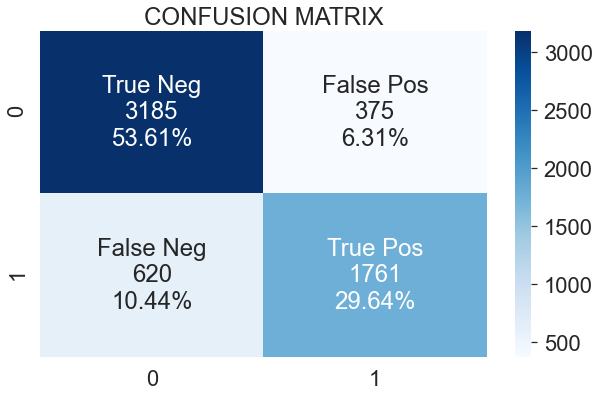

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

plt.figure(figsize=(10, 6))
sns.set(font_scale=2)
plt.title('CONFUSION MATRIX')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf.flatten()/np.sum(conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf, annot=labels, fmt='', cmap='Blues')

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

#https://graphviz.gitlab.io/_pages/Download/Download_windows.html

ylist = Y.values.astype('int64')
ylist
from sklearn.preprocessing import label_binarize
ybinary = label_binarize(ylist, classes=[0, 1])
n_classes = ybinary.shape[1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,ybinary, test_size=0.2)
y_score = cross_val_predict(clf, X, ybinary, cv=10 ,method='predict')
from sklearn.preprocessing import label_binarize
ybinary = label_binarize(ylist, classes=[0, 1])
n_classes = ybinary.shape[1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,ybinary, test_size=0.2)
y_score = cross_val_predict(clf, X, ybinary, cv=10 ,method='predict')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

n_classes = ybinary.shape[1]
#X1_train, X1_test, y1_train, y1_test
#y_score = classifier.fit(X_train3, y_train3).decision_function(X_test3)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ybinary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ybinary.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

<Figure size 432x288 with 0 Axes>

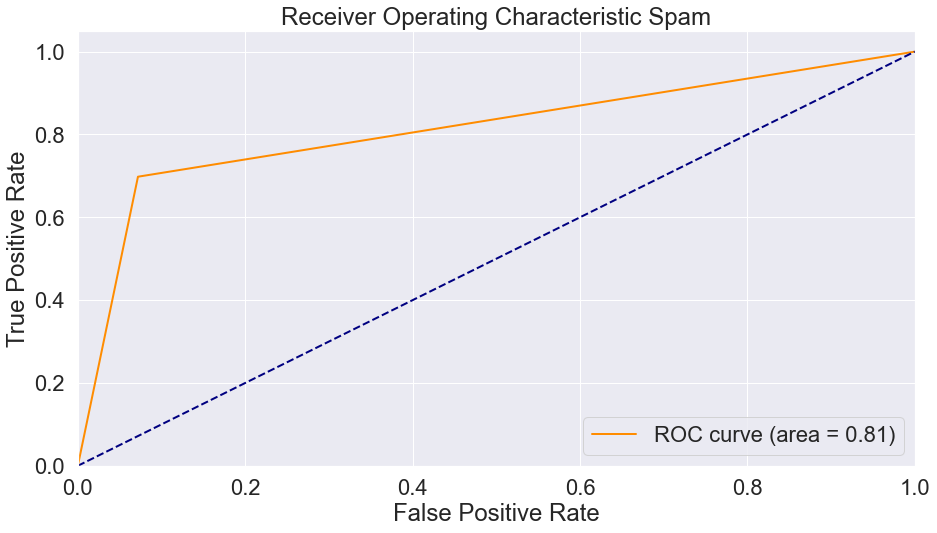

In [30]:
plt.figure(figsize=(15,8))

lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Higgs')
plt.legend(loc="lower right")
plt.show()

### ANALYSIS OF VARIABLES CONTRIBUTING THE MOST TO THE MODEL (Q4)

The final part of our analysis was to explore feature importance.  This illustrates which variables in the dataset are most likely predictors of spam. The list below captures the results from our model and aligns with the Decision Tree path we outlined above.

The features determined to be the most important to our model are:
* perHTML
* numLine
* numEnd
* perCaps
* avgWordLen
* isWrote
* bodyCharCt
* forwards
* isInReplyTo

The bar-chart below further illustrates the feature importance and their order of importance to the Decision Tree from left to right.

In [31]:
# Merge field names and feature importance to display them together
fi = pd.DataFrame(clf.steps[1][1].feature_importances_, columns =['featimp'])
featuresnames = pd.DataFrame(X1_test.columns.values.tolist(), columns =['fields'])

featimpdf = pd.merge(featuresnames, fi, left_index=True, right_index=True)
featimpdf = featimpdf.sort_values(by='featimp', ascending=False)
featimpdf

,fields,featimp
24,perHTML,0.238695
16,numLines,0.193421
11,numEnd,0.131068
22,perCaps,0.114620
27,avgWordLen,0.083577
15,isWrote,0.046074
17,bodyCharCt,0.043125
26,forwards,0.041321
3,isInReplyTo,0.039544
21,numRec,0.035246


[Text(0, 0, 'perHTML'),
 Text(0, 0, 'numLines'),
 Text(0, 0, 'numEnd'),
 Text(0, 0, 'perCaps'),
 Text(0, 0, 'avgWordLen'),
 Text(0, 0, 'isWrote'),
 Text(0, 0, 'bodyCharCt'),
 Text(0, 0, 'forwards'),
 Text(0, 0, 'isInReplyTo'),
 Text(0, 0, 'numRec'),
 Text(0, 0, 'multipartText'),
 Text(0, 0, 'subBlanks'),
 Text(0, 0, 'numAtt'),
 Text(0, 0, 'hour'),
 Text(0, 0, 'isOrigMsg'),
 Text(0, 0, 'subSpamWords'),
 Text(0, 0, 'subQuesCt'),
 Text(0, 0, 'isRe'),
 Text(0, 0, 'isDear'),
 Text(0, 0, 'subExcCt'),
 Text(0, 0, 'underscore'),
 Text(0, 0, 'isYelling'),
 Text(0, 0, 'noHost'),
 Text(0, 0, 'isPGPsigned'),
 Text(0, 0, 'hasImages'),
 Text(0, 0, 'subPunc'),
 Text(0, 0, 'sortedRec'),
 Text(0, 0, 'priority'),
 Text(0, 0, 'numDlr')]

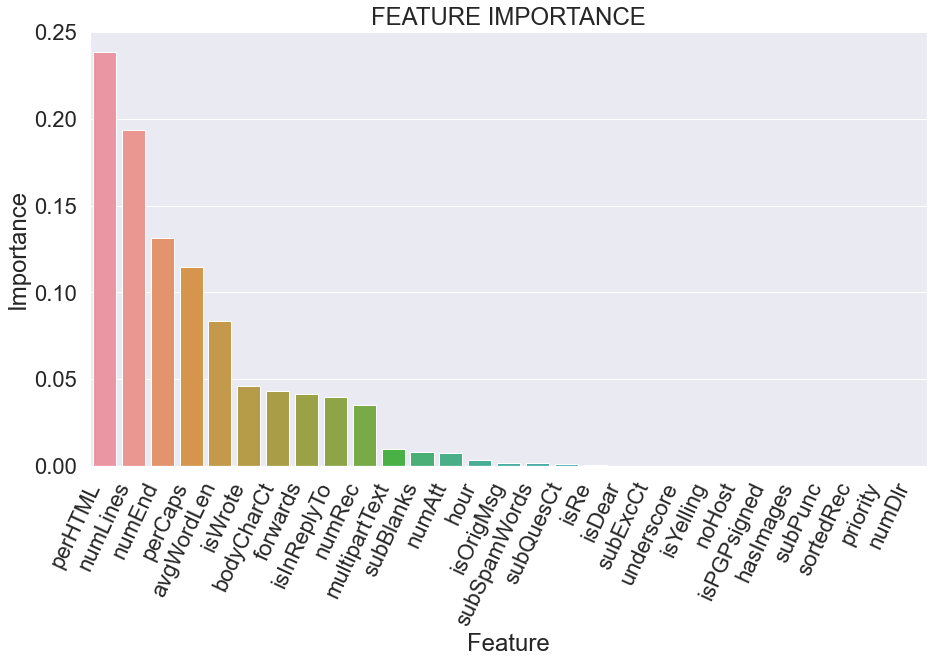

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
ax = sns.barplot(x=featimpdf.fields, y=featimpdf.featimp)
ax.set_title('FEATURE IMPORTANCE')
plt.xlabel("Feature")
plt.ylabel("Importance")
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50,20), dpi = 300)

#tree.plot_tree(clf.steps[1][1]);

In [34]:
cn = ['Spam', 'NotSpam']
#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (50,20), dpi = 300)

#tree.plot_tree(clf.steps[1][1],
#               feature_names = features, 
#               class_names=cn,
#               filled = True);
# fig.savefig(r'C:\Users\jjsch\Downloads\Week_5_Materials_2\plottreefncn.png')

In [37]:
# export the decision tree to a dot file
from graphviz import Digraph
from graphviz import Source
from io import StringIO
import pydot
import graphviz

tree.export_graphviz(clf.steps[1][1],
                     out_file=(r"C:\Users\jjschued\Documents\GitHub\7333QTW\Case Study 3\tree.dot"),
                            #r"C:\Users\kevinm\Documents\GitHub\7333QTW\Case Study 3\tree.dot"),
                               #(r"C:\Users\jjsch\Downloads\Week_5_Materials_2\tree.dot"),
                     feature_names = features, 
                     class_names=cn,
                     filled = True)

dotfile = StringIO()

In [38]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
# export to PDF for easier zooming and viewing of the decision tree. 
dot_data = tree.export_graphviz(clf.steps[1][1], out_file=None, feature_names=features, class_names=cn,
               filled = True)
graph = graphviz.Source(dot_data) 
graph.render("case3chosentree",view = True)

'case3chosentree.pdf'

### ANALYZE PATHS THROUGH TREE (Q2)

The images below represent parts of the Decision Tree we selected. These select images are for explanation purposes. To see the complete tree, the file can be found here: https://github.com/jjschueder/7333QTW/blob/master/Case%20Study%203/case3chosentree.pdf



**High Level Visual of the Selected Decision Tree:**
The tree shows the eight layers (1 root node plus 7 nodes) of the tree to classify an email as spam or not spam. Each node in the tree compares the email attributes in our dataset to a defined value. Based on the value in the data, if it meets the criteria, it will either be classified or moved onto another node (where more decsions will be made). At the top level of the decsion visual, there are two lines extending downwards from the root node. The left side means the email meets the criteria displayed in the node, while an arrow to the right means it did not meet the criteria. The same is true as the tree branches downward to further layers of the tree. Generally, left branches are true - attribute meets defined criteria - while right means it does not. 

Each node contains the classifcation decision, a gini score, number of samples, value, and a class value. 

* gini - "The gini score is a metric that quantifies the purity of the node/leaf. A gini score greater than zero implies that samples contained within that node belong to different classes. A gini score of zero means that the node is pure, that within that node only a single class of samples exist." (Reference: https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d)
* samples - the number of samples used to determine this decisions weight on the model.
* value - the breakup of the counts of true or false for this decsion
* class value - the current direction the decision is moving towards (e.g. spam or not spam)

![title](img/ChosenTreehighlevelgraph.png)

**Left Side of Tree:**
This side of the tree is the part of the tree that meets the root node's criteria. This node's criteria is **numLines** is less than or equal to 52.5. Of the sample size, 5,574 rows of data are dispositioned to the left side of the tree while the remaining 1,888 will be further analyzed in the right branch. In the next node, an evaluation is performed on the **perHTML** column and if the variable value is less than 3.926. We will continue to follow the branch where this is true. The data has 1,301 values that do  meet this criteria. Next, **subSpamWords** is evaluated for whether the value is less than 0.5; if so,  it classified as not spam. Of course this the rest of the left branches have many other evaluations with termination leaves indicating different classifications of either spam or not spam. 
![title](img/TreeLeftBranchZoom2.png)

**Right Side of Tree:** 
This side of the tree does not meet the root node's criteria. Next, an evaluation is performed on whether **avgWordLen** is less than 3.978. Approximately 1198 emails of the evaluated 2148 do meet this criteria and are transferred to the next node, where **bodyCharCt** are evaluated. Those less than the criteria value evaluted are passed **inInReplyTo** is less than 0.5 and if less goes to classified as spam.
![title](img/RightBranchTreeZoom2.png)


Both sides of the tree have many decision points in the 8 layers. As might be expected, these decsions are based on the fields that were identified in the model as important features. The features with higher importance values are used more often in the tree to make the decisions. The nodes also contain a 'gini' number, number of samples, and how many of the samples satisfied the selection, so ultimately each node contains a label that indicates whether the particular evaluation would point more towards spam or not spam. 

## CONCLUSION

Our mission is reducing the time spent and the threat with spam email so that you and your customers can be more productive. We created two models as discussed above, one with max depth of 150 for accuracy and the other with max depth of 7 for simplicity and generalization. We chose the less complex model for implantation because spam is always changing, and the hop is that a more generalized model will stay more relevant to a wide range of attacks without being retrained. This idea is supported with the 10 fold cross validation that was performed. The average scores did not change more than a percentage point from the original score at 89.2%. The model as stated above is also more interpretable allowing for more easy explanation to users. An easy to read chart can be provide to users to understand what attributes are most likely to indicate that an email is spam. 

Future implementation can take a variation of the pipeline built above to take feedback from the user to maintain fresh and accurate model. The pipeline is built to handle missing values that users or emails may have left out. Spammers are always adapting to their environment and our model along with feedback from the users will adapt along with them. 


## APPENDIX

### Appendix 1: Evaluation Metrics of most complex/accurate model
The evaluation below shows cross validation of the deeper tree model with more branches.  Accuracy and other metrics are better.

In [47]:
from sklearn.pipeline import Pipeline
dt_clf = Pipeline([("imputer", SimpleImputer(missing_values = np.nan, strategy = 'mean')),
                ("classify",DecisionTreeClassifier(criterion = 'entropy', 
                                                      max_depth= 40, 
                                                      max_features= 'auto', 
                                                      min_samples_leaf= 2))])

dt_clf.fit(X1_train,y1_train)
yhat2 = dt_clf.predict(X1_test)
print ('accuracy:', mt.accuracy_score(y1_test,yhat2))
print (dt_clf)

accuracy: 0.9480171489817792
Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('classify',
                 DecisionTreeClassifier(class_weight=None, criterion='entropy',
                                        max_depth=40, max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=2, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)


In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
totalacc = 0
totalprec = 0
totalrec= 0
totalf1  = 0
for fold, (train, test) in enumerate(cvx.split(X,y)):
#    print ('Next Evaluation:')
    # train the decision tree algorithm
    dt_clf.fit(X.iloc[train],y[train])
    yhat = dt_clf.predict(X.iloc[test])
#    print ('accuracy:', mt.accuracy_score(y[test],yhat),'\n')
    conf = mt.confusion_matrix(y[test],yhat)
#    print("confusion matrix\n",conf,'\n')
#    print("Precision Score is: {}" .format(precision_score(y[test],yhat, average='weighted')),'\n')
#    print("Recall Score is: {}" .format(recall_score(y[test],yhat, average='weighted')),'\n')
#    print("F1 Score is: {}" .format(f1_score(y[test],yhat, average='weighted')),'\n')
    acc = mt.accuracy_score(y[test],yhat)
    prec = precision_score(y[test],yhat, average='weighted')
    rec = recall_score(y[test],yhat, average='weighted')
    f1 = f1_score(y[test],yhat, average='weighted')
    totalacc += acc
    totalprec += prec
    totalrec += rec
    totalf1 += f1

avgaccuracy = 100*totalacc / cvx.n_splits
avgprec = 100*totalprec / cvx.n_splits
avgrec = 100*totalrec / cvx.n_splits
avgf1 = 100*totalf1 / cvx.n_splits
print("Ten Time Split Average Metrics: \n")
print("Accuracy:", avgaccuracy,'\n Precsion:',avgprec,'\n Recall:', avgrec, '\n F1: ', avgf1, '\n')
print("Last evaluation confusion Matrix: \n")
print("Confusion Matrix\n",conf,'\n')

Ten Time Split Average Metrics: 

Accuracy: 94.98392282958199 
 Precsion: 94.95356759657312 
 Recall: 94.98392282958199 
 F1:  94.92597239107305 

Last evaluation confusion Matrix: 

Confusion Matrix
 [[1341   29]
 [  70  426]] 



In [48]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

#https://graphviz.gitlab.io/_pages/Download/Download_windows.html

ylistd = Y.values.astype('int64')
ylistd
from sklearn.preprocessing import label_binarize
ybinaryd = label_binarize(ylistd, classes=[0, 1])
n_classes = ybinaryd.shape[1]
X_train2d, X_test2d, y_train2d, y_test2d = train_test_split(X,ybinaryd, test_size=0.2)
y_scored = cross_val_predict(dt_clf, X, ybinaryd, cv=10 ,method='predict')
from sklearn.preprocessing import label_binarize
ybinaryd = label_binarize(ylistd, classes=[0, 1])
n_classes = ybinaryd.shape[1]
X_train2d, X_test2d, y_train2d, y_test2d = train_test_split(X,ybinary, test_size=0.2)
y_scored = cross_val_predict(dt_clf, X, ybinaryd, cv=10 ,method='predict')

<Figure size 432x288 with 0 Axes>

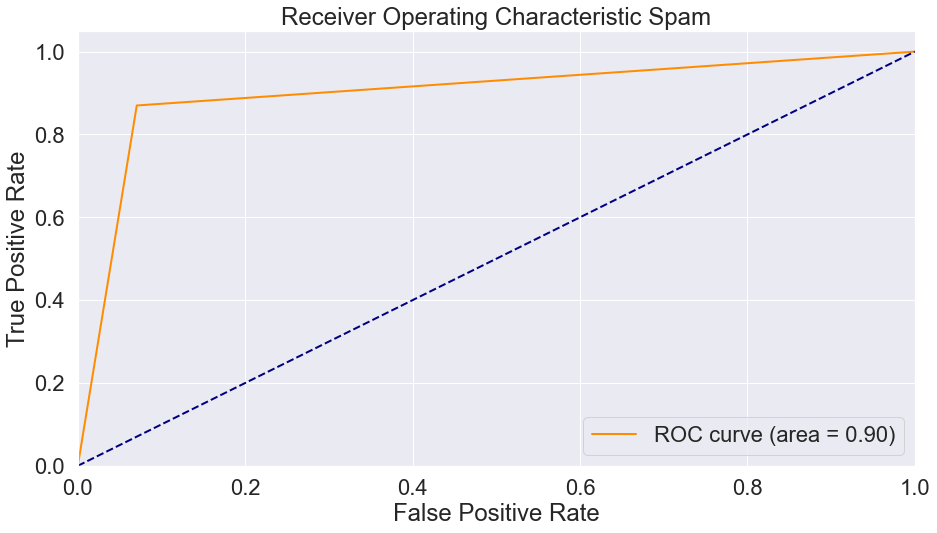

In [45]:
#X1_train, X1_test, y1_train, y1_test
#y_score = classifier.fit(X_train3, y_train3).decision_function(X_test3)
# Compute ROC curve and ROC area for each class
fprd = dict()
tprd = dict()
roc_aucd = dict()
for i in range(n_classes):

#y1_test,yhat    
    fprd[i], tprd[i], _ = roc_curve(ybinaryd, y_scored)
    roc_aucd[i] = auc(fprd[i], tprd[i])

# Compute micro-average ROC curve and ROC area
fprd["micro"], tprd["micro"], _ = roc_curve(ybinaryd.ravel(), y_scored.ravel())
roc_aucd["micro"] = auc(fprd["micro"], tprd["micro"])

#Plot of a ROC curve for a specific class
plt.figure()
plt.figure(figsize=(15,8))
lw = 2
plt.plot(fprd[i], tprd[i], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_aucd[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Spam')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y1_test,yhat)
print(cf_matrix)

[[1072  342]
 [ 339  113]]


### Apendix 2:  Complete List of Parameters for Decision Trees


| Parameter                | Definition                                                                                                                                                                                  |
|:-------------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Criterion                | function to measure the quality of a split; supported criteria are "gini" for Gini impurity and "entropy" for information gain                                                              |
| Splitter                 | strategy used to choose the best split at each node; supported strategies are "best" to choose best split and "random"  to choose best random split                                              |
| Max_depth                | maximum depth of tree; if "None", then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples                                           |
| Min_samples_split        | minimum number of samples required to split an internal node                                                                                                                                |
| Min_samples_leaf         | minimum number of samples required at a leaf node; split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each left and right branches |
| Min_weight_fraction_leaf | minimum weighted fraction of sum total of weights (for all input samples) required to be at a leaf node; samples have equal weight when sample_weight is not provided                       |
| Max_features             | number of features to consider when looking for best split                                                                                                                                  |
| Random_state             | controls randomness of the estimator                                                                                                                                                            |
| Max_leaf_nodes           | grow a tree with max_leaf_nodes in best-first fashion; best nodes defined as relative reduction in impurity                                                                                 |
| Min_impurity_decrease    | node will be split if this split induces a decrease of impurity greater than/equal to this value                                                                                            |
| Class_weight             | weights associated with classes                                                                                                                                                             |
| Ccp_alpha                | complexity parameter used for Minimal Cost-Complexity Pruning                                                                                                                               |

### Appendix 3 Gaussian Model: https://github.com/jjschueder/7333QTW/blob/master/Case%20Study%203/Case_Study_3_Gaussian.ipynb